# Campus Placement Data

This data set consists of Placement data of students in a college of India. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students.

Business UnderStanding :
<ol>
<li>Does GPA affect placement?</li>
<li>Does Higher Secondary School's Percentage still affect campus placement?</li>
<li>Is work experience required for securing good job?</li>
    <li>What factor affect the salary?</li>    
</ol>
      

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [15]:
data = pd.read_csv("Placement_Data.csv")
#Remove Serial Number
data.drop("sl_no", axis=1, inplace=True)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [17]:
#pre-processing data
data.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [20]:
#only salary has null values 
#67 people are unplaced
data['salary']=data['salary'].fillna(0).astype(float)
data.head() 

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


# Exploring Data by each Features


Does gender affect placements?

In [21]:
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

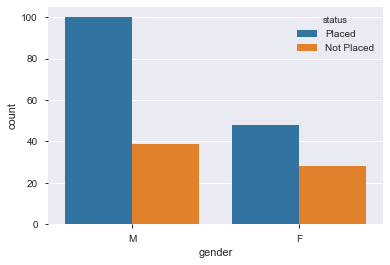

In [22]:
sns.countplot("gender", hue="status", data=data)
plt.show()

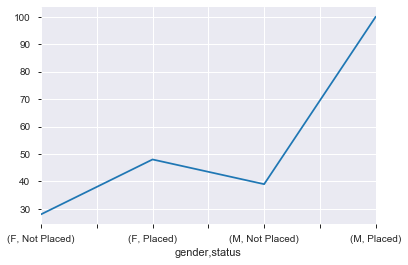

In [34]:
data.groupby(['gender','status'])['status'].count().plot.line()

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


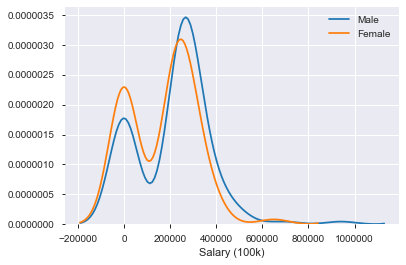

In [23]:
sns.kdeplot(data.salary[ data.gender=="M"])
sns.kdeplot(data.salary[ data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

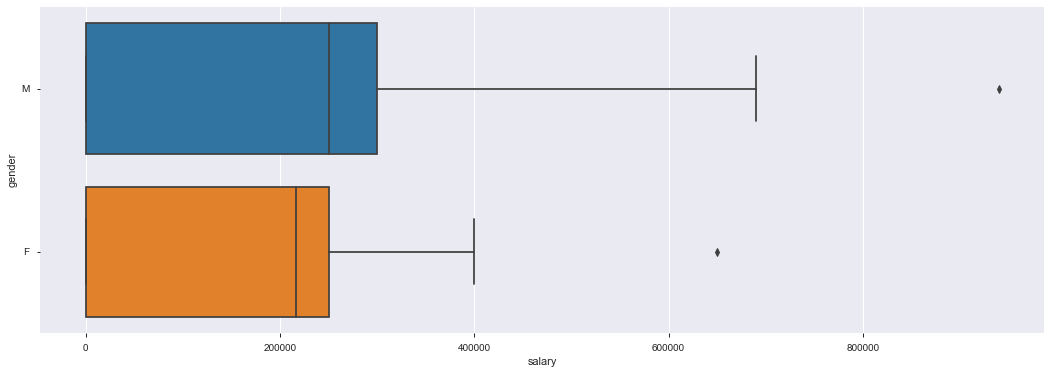

In [24]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "gender", data=data)
plt.show()

Conclusion:

<ol>
    <li>We have samples of 139 Male studets and 76 Female students.
    <li>30 Female and 40 Male students are not placed. Male students have comparatively higher placemets.
    <li>More outliers on Male -> Male students are getting high CTC jobs.
    <li>Male students are offered slightly greater salary than female on an average.
</ol>

Does Secondary Education affect placements?

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


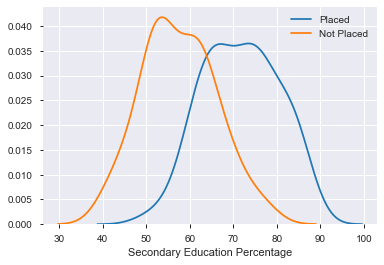

In [26]:
sns.kdeplot(data.ssc_p[ data.status=="Placed"])
sns.kdeplot(data.ssc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Secondary Education Percentage")
plt.show()

<li>All students with Secondary Education Percentage above 90% are placed
<li>All students with Secondary Education Percentage below 50% are not-placed
<li>Students with good Secondary Education Percentage are placed on average.

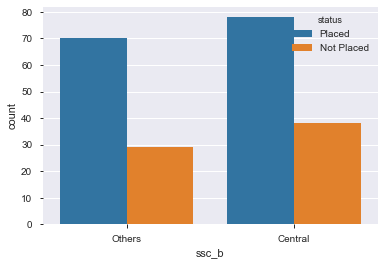

In [27]:
sns.countplot("ssc_b", hue="status", data=data)
plt.show()

Board Of Education does not affect Placement Status much

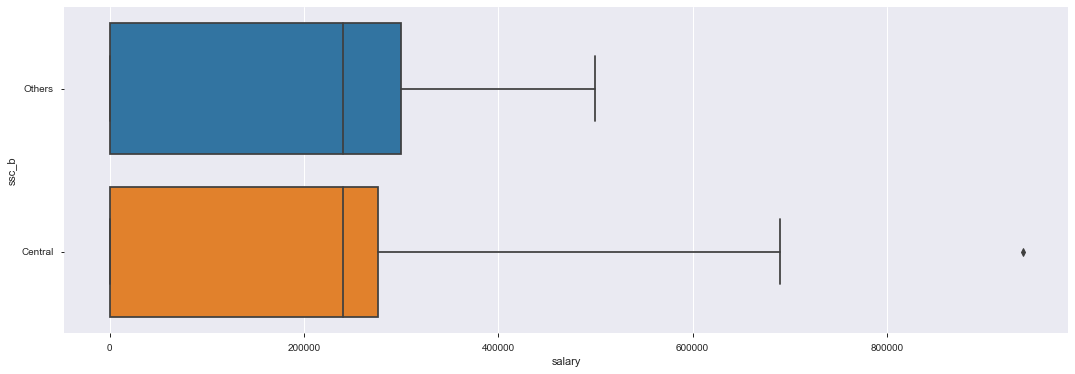

In [28]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "ssc_b", data=data)
plt.show()

Outliers on both, but students from Central Board are getting the highly paid jobs.

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


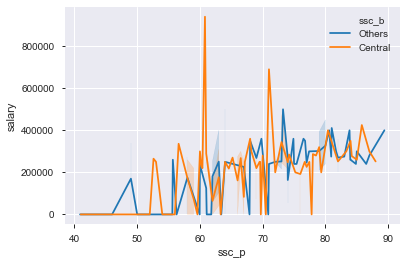

In [29]:
sns.lineplot("ssc_p", "salary", hue="ssc_b", data=data)
plt.show()

<li>No specific pattern (correlation) between Secondary Education Percentage and Salary.
<li>Board of Education is Not Affecting Salary

Does Higher Secondary School affect Placements?

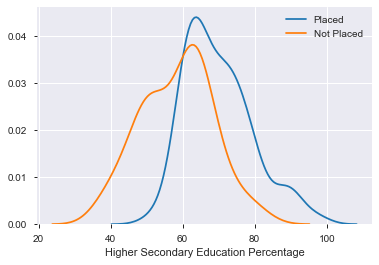

In [35]:
#Kernel-Density Plot
sns.kdeplot(data.hsc_p[ data.status=="Placed"])
sns.kdeplot(data.hsc_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Higher Secondary Education Percentage")
plt.show()

<li>Overlap here too. More placements for percentage above 65%
<li>Straight drop below 60 in placements -> Perntage must be atleast 60 for chance of being placed

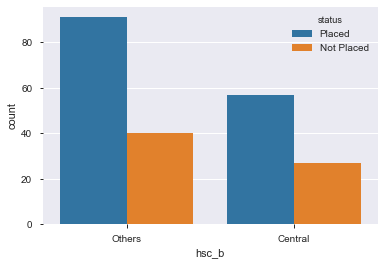

In [36]:
sns.countplot("hsc_b", hue="status", data=data)
plt.show()

Education Board again, doesn't affect placement status much

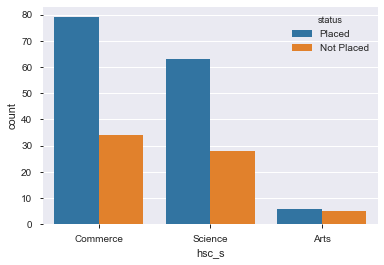

In [37]:
sns.countplot("hsc_s", hue="status", data=data)
plt.show()

<li>We have very less students with Arts specialization.
<li>Around 2:1 placed:unplaced ratio for both Science and Commerse students

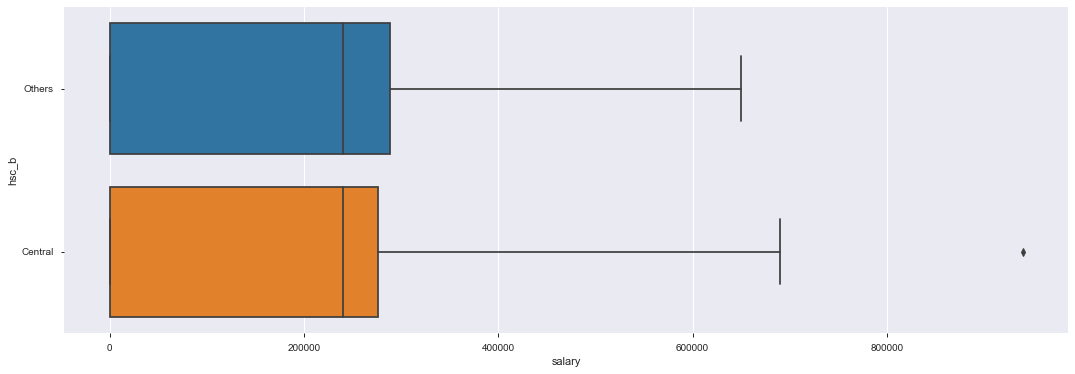

In [39]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_b", data=data)
plt.show()

Outliers on both, board doesn't affect getting highly paid jobs. Highest paid job was obtailed by student from Central Board though.

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


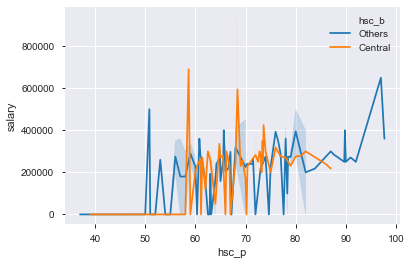

In [40]:
sns.lineplot("hsc_p", "salary", hue="hsc_b", data=data)
plt.show()

<li>High salary from both Central and Other.
<li>High salary for both high and low percentage.
<li>Thus, both these feature doesnot affect salary.

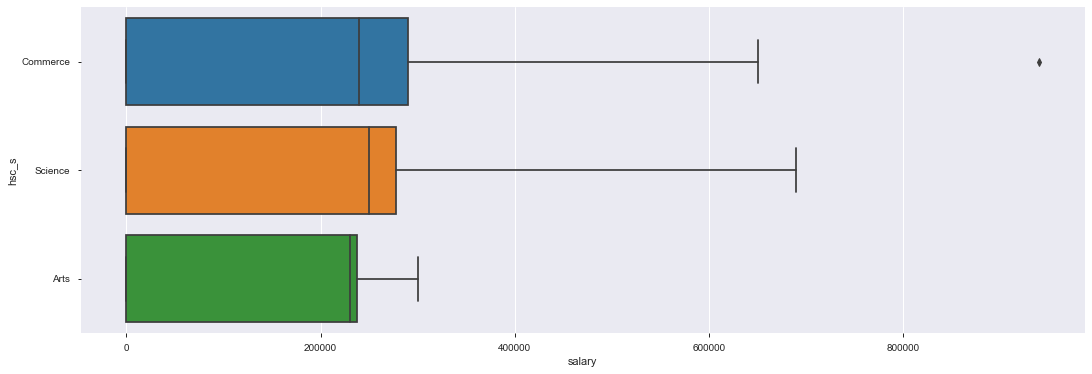

In [41]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "hsc_s", data=data)
plt.show()

<Li>We can't really say for sure due to only few samples of students with Arts Major, but they aren't getting good salaries.
<Li>
Commerse students have slightly better placement status.

Does Under Graduate affect placements?

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


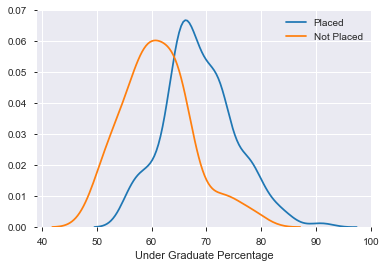

In [42]:
#Kernel-Density Plot
sns.kdeplot(data.degree_p[ data.status=="Placed"])
sns.kdeplot(data.degree_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Under Graduate Percentage")
plt.show()

<li>Overlap here too. But More placements for percentage above 65.
<Li>UG Percentage least 50% to get placement

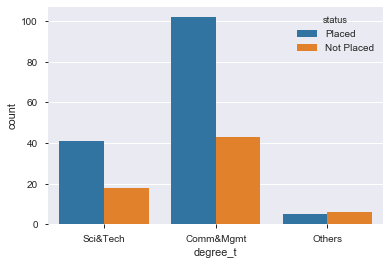

In [43]:
sns.countplot("degree_t", hue="status", data=data)
plt.show()

<Li>We have very less students with "Other". We cant make decision from few cases.
<li>Around 2:1 placed:unplaced ratio for both Science and Commerse students

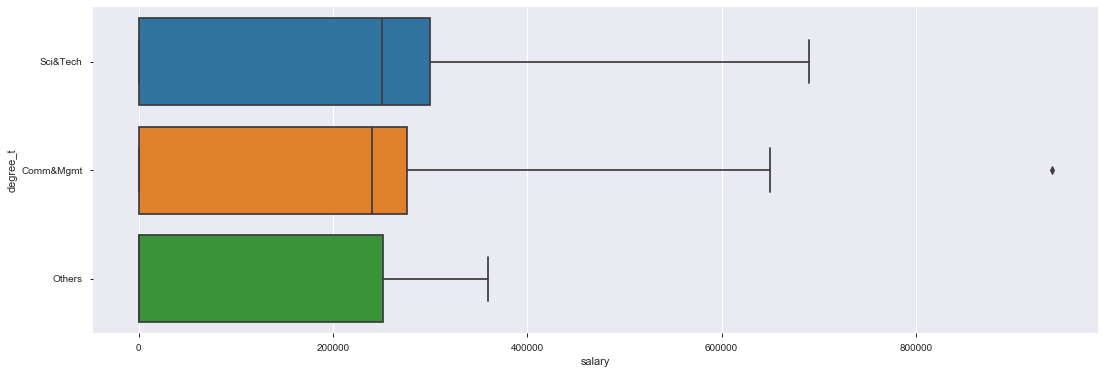

In [44]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "degree_t", data=data)
plt.show()

<Li>Science&Tech students getting more salary on average
<li>Management stidents are getting more highly paid dream jobs.

Does Work Experience affect placements?

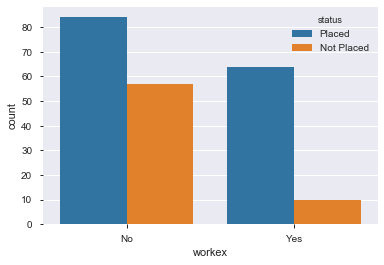

In [46]:
sns.countplot("workex", hue="status", data=data)
plt.show()

<Li>This affects Placement. Very few students with work experience not getting placed!

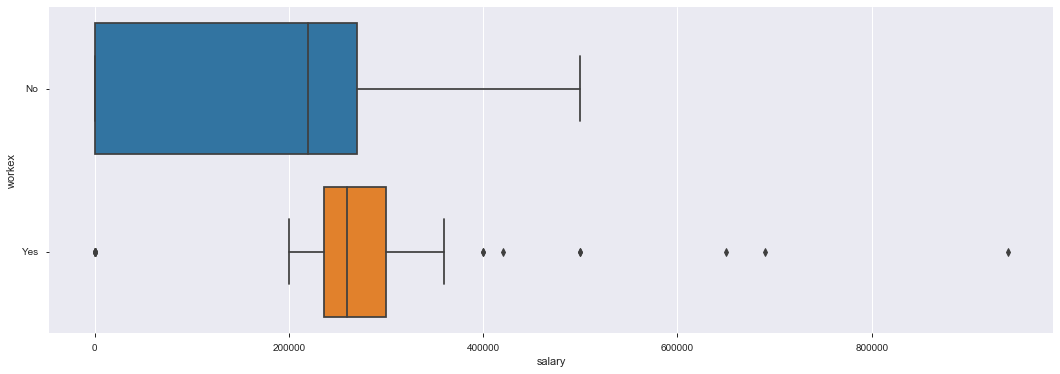

In [47]:
plt.figure(figsize =(18,6))
sns.boxplot("salary", "workex", data=data)
plt.show()

<Li>Outliers (High salary than average) on bith end but students with experience getting dream jobs
<li>Average salary as well as base salary high for students with work experience.

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


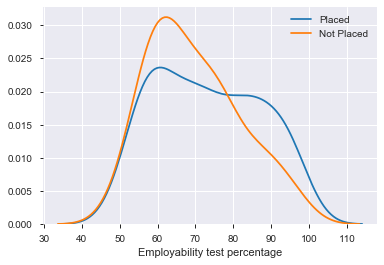

In [48]:
#Kernel-Density Plot
sns.kdeplot(data.etest_p[ data.status=="Placed"])
sns.kdeplot(data.etest_p[ data.status=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")
plt.show()

Post Graduate Specialization

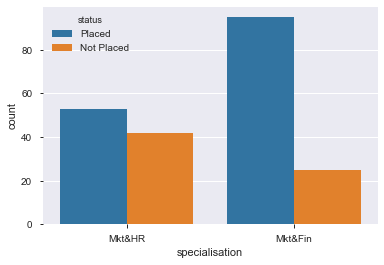

In [49]:
sns.countplot("specialisation", hue="status", data=data)
plt.show()

<Li>his feature affects Placement status.
<Li>Comparitively very low not-placed students in Mkt&Fin Section

Does MBA Percentage affect placements?

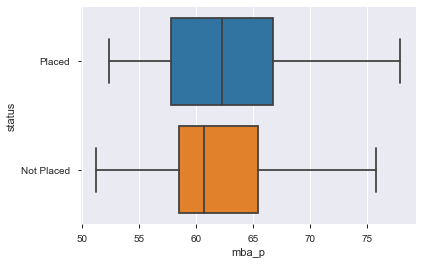

In [50]:
sns.boxplot("mba_p", "status", data=data)
plt.show()

C:\Users\KIIT\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


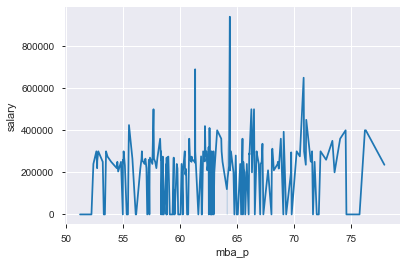

In [51]:
sns.lineplot("mba_p", "salary", data=data)
plt.show()

MBA Percentage also deos not affect salary much

# Data Pre-Processing 

In [52]:
data.drop(['ssc_b','hsc_b'], axis=1, inplace=True)

# Feature Encoding

In [54]:
data.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [55]:
data["gender"] = data.gender.map({"M":0,"F":1})
data["hsc_s"] = data.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
data["degree_t"] = data.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
data["workex"] = data.workex.map({"No":0, "Yes":1})
data["status"] = data.status.map({"Not Placed":0, "Placed":1})
data["specialisation"] = data.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})

# Problem Statement

<Li>Predicting If Students gets placed or not (Binary Classification Problem)


In [56]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [58]:
data_clf = data.copy()
data_reg = data.copy()
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']

In [59]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [60]:
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

In [61]:
accuracy_score(y_test, y_pred)

0.8461538461538461

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        18
           1       0.89      0.89      0.89        47

    accuracy                           0.85        65
   macro avg       0.81      0.81      0.81        65
weighted avg       0.85      0.85      0.85        65



In [63]:
#Using Random Forest Algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

In [64]:
accuracy_score(y_test, y_pred)

0.8769230769230769

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75        18
           1       0.88      0.96      0.92        47

    accuracy                           0.88        65
   macro avg       0.87      0.81      0.83        65
weighted avg       0.88      0.88      0.87        65



Feature Importance (Percentage)
<Li>Tree based algorithms can be used to compute feature importance

<Li>Checking feature importance obtained from these:

In [66]:
rows = list(X.columns)
imp = pd.DataFrame(np.zeros(6*len(rows)).reshape(2*len(rows), 3))
imp.columns = ["Classifier", "Feature", "Importance"]
#Add Rows
for index in range(0, 2*len(rows), 2):
    imp.iloc[index] = ["DecisionTree", rows[index//2], (100*dtree.feature_importances_[index//2])]
    imp.iloc[index + 1] = ["RandomForest", rows[index//2], (100*random_forest.feature_importances_[index//2])]

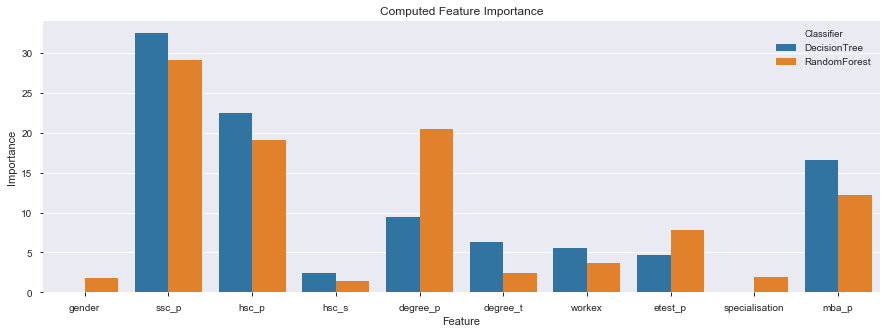

In [67]:
plt.figure(figsize=(15,5))
sns.barplot("Feature", "Importance", hue="Classifier", data=imp)
plt.title("Computed Feature Importance")
plt.show()

 <Li>hsc_s -> Specialization in Higher Secondary Education
<li>
degree_t -> Under Graduation(Degree type)- Field of degree education
<Li>
specialisation -> Post Graduation(MBA)- Specialization

##### Field of study does not seem to affect much

One Hot Encoding

In [68]:
# Seperating Features and Target
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p',]]
y = data_clf['status']
#Reverse Mapping and making Categorical
X["gender"] = pd.Categorical(X.gender.map({0:"M",1:"F"}))
X["hsc_s"] = pd.Categorical(X.hsc_s.map({0:"Commerce",1:"Science",2:"Arts"}))
X["degree_t"] = pd.Categorical(X.degree_t.map({0:"Comm&Mgmt",1:"Sci&Tech",2:"Others"}))
X["workex"] = pd.Categorical(X.workex.map({0:"No",1:"Yes"}))
X["specialisation"] = pd.Categorical(X.specialisation.map({0:"Mkt&HR",1:"Mkt&Fin"}))

c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [69]:
#One-Hot Encoding
X = pd.get_dummies(X)
colmunn_names = X.columns.to_list()

Feature Scaling:
<li>    
Percentages are on scale 0-100
<Li>Categorical Features are on range 0-1 (By one hot encoding)
<Li>High Scale for Salary -> Salary is heavily skewed too -> SkLearn has RobustScaler which might work well here
Scaling Everything between 0 and 1 (This wont affect one-hot encoded values)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)
from sklearn.linear_model import LogisticRegression


In [73]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)


c:\users\kiit\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
accuracy_score(y_test, y_pred)


0.8307692307692308

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.52      0.67        21
           1       0.81      0.98      0.89        44

    accuracy                           0.83        65
   macro avg       0.86      0.75      0.78        65
weighted avg       0.85      0.83      0.82        65



Computating Feature importance by Mean Decrease Accuracy (MDA)

In [78]:
#pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(logistic_reg).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.1354 ± 0.0529,x0
0.0523 ± 0.0246,x2
0.0492 ± 0.0452,x13
0.0462 ± 0.0435,x1
0.0338 ± 0.0230,x16
0.0123 ± 0.0359,x9
0.0092 ± 0.0151,x14
0.0062 ± 0.0314,x5
0 ± 0.0000,x3
-0.0031 ± 0.0123,x11


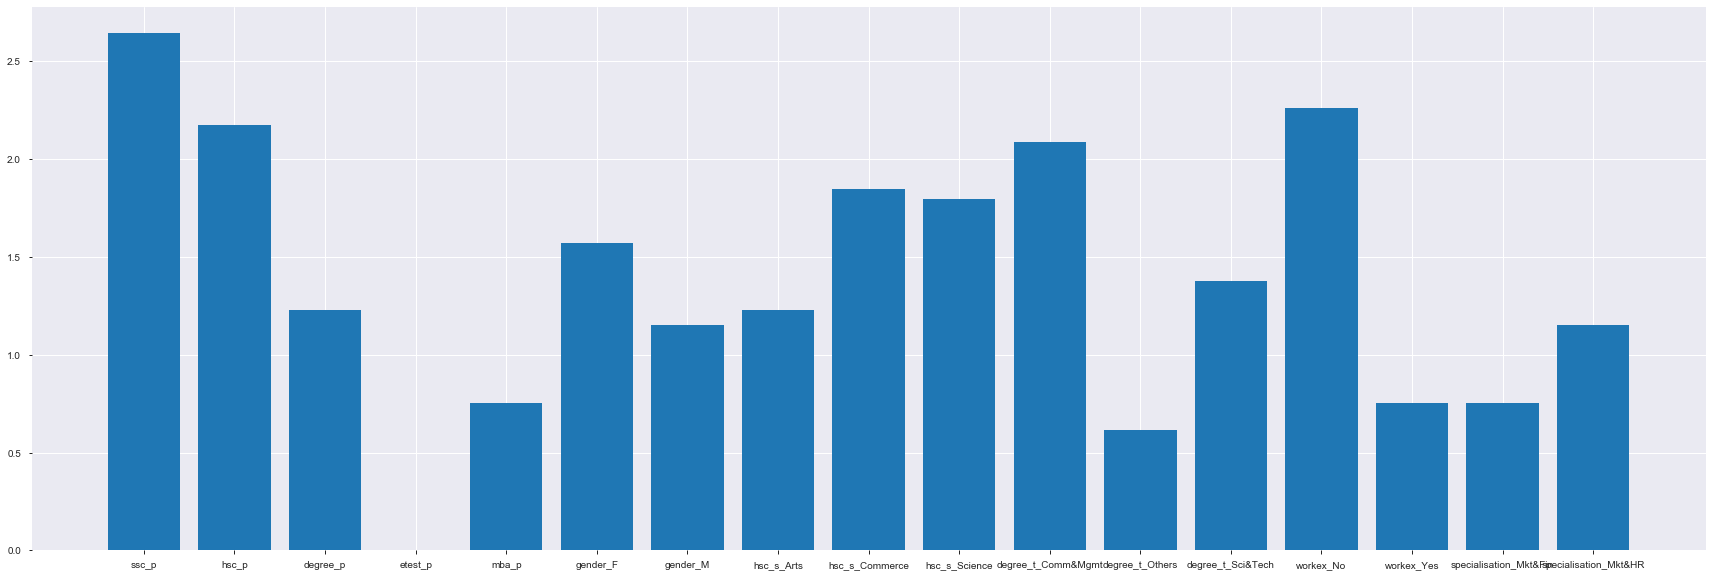

In [79]:
plt.figure(figsize=(30, 10))
plt.bar(colmunn_names , perm.feature_importances_std_ * 100)
plt.show()

From Feature Importance of Tree-based Algorithms and MDA we can conclude that:

<Li>Academic performance affects placement (All percentages had importantance)
<Li>Work Experience Effects Placement
<Li>Gender and Specialization in Commerse (in higher-seondary and undergraduate) also has effect on placements.